In [9]:
import pandas as pd, numpy, scipy
import sklearn, sklearn.preprocessing, sklearn.decomposition
import matplotlib, matplotlib.pyplot

matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16*(2/3), 9*(2/3)), 
                            'axes.labelsize':20
                           }) #maybe change the style in the future

input_file = 'C:/Users/79516/Downloads/DESeq2_TPM_values.tsv'

In [10]:
expression = pd.read_csv(input_file, sep='\t', index_col=0)
expression = expression.filter(regex='^073', axis=1)

print(expression.shape)
expression

(40320, 30)


,073_114,073_115,073_116,073_117,073_118,073_119,073_120,073_121,073_122,073_123,...,073_73,073_74,073_75,073_76,073_77,073_78,073_79,073_80,073_81,073_82
ENSG00000000003,35.906809,31.938388,28.883981,43.596910,33.984692,32.198999,35.185194,34.600479,34.299543,35.332225,...,38.878165,34.539854,36.341524,36.358163,35.662062,39.354423,36.897123,40.268850,40.243493,39.279878
ENSG00000000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033733,0.053681,0.054686,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000000419,47.683476,77.131702,78.609848,67.090474,81.335528,84.013684,81.626058,78.569781,76.439853,77.589006,...,49.313600,74.750882,73.621733,88.938917,84.652970,78.607037,77.642204,78.861113,74.648598,56.894679
ENSG00000000457,4.337263,3.949651,4.400162,4.617074,5.032846,4.603494,3.830178,3.654271,4.130113,4.032753,...,3.751108,4.686774,4.408532,4.283488,5.221377,4.081310,4.327263,4.538531,4.417790,3.793313
ENSG00000000460,5.689600,3.709494,5.157470,13.021706,4.386287,4.029393,4.069694,3.527497,4.842220,3.713090,...,4.732061,4.222485,3.397340,3.719525,3.375133,3.705756,3.933664,3.627546,3.490585,5.726682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000286255,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000286261,3.016605,4.211094,3.016046,3.587785,3.406454,3.268076,3.750101,3.095595,3.496301,3.461232,...,3.175727,3.208048,3.051978,4.661742,3.624199,3.160171,3.502509,4.057444,3.266823,2.816905
ENSG00000286264,3.565990,3.537869,3.665634,4.040888,3.882212,4.699214,4.396297,3.851323,3.471666,3.691466,...,3.843893,3.481138,4.733761,5.631273,3.520212,3.984557,4.859894,3.126438,3.854971,3.886703
ENSG00000286265,2.308834,2.326969,2.268726,3.260720,2.885310,3.850129,4.571480,3.504572,2.697294,3.098562,...,2.891272,2.048150,3.144443,3.813912,2.308239,3.848015,4.044782,3.206352,3.279666,3.389409


In [11]:
substantial_expression = expression[expression.max(axis=1) >= 2]
high_expression = expression[expression.max(axis=1) >= 100] 

print(substantial_expression.shape)
print(high_expression.shape) #forming axis?


(14369, 30)
(2341, 30)


In [12]:
transpose = substantial_expression.transpose()
pca_substantial_expression = numpy.log2(transpose + 1)

transpose = high_expression.transpose()
pca_high_expression = numpy.log2(transpose + 1) #axis transporated?

In [13]:
#this part is for the substantial expression

scaled_data = sklearn.preprocessing.StandardScaler().fit_transform(pca_substantial_expression)
model = sklearn.decomposition.PCA(n_components=2)
new = model.fit_transform(scaled_data)
explained = model.explained_variance_ratio_
print(explained) #where the output goes to

[0.70385186 0.10019942]


In [14]:
log2_tpm_PO = numpy.log2(expression + 1)
log2_tpm_PO.head()

,073_114,073_115,073_116,073_117,073_118,073_119,073_120,073_121,073_122,073_123,...,073_73,073_74,073_75,073_76,073_77,073_78,073_79,073_80,073_81,073_82
ENSG00000000003,5.205815,5.041698,4.901300,5.478872,5.128652,5.053068,5.177328,5.153825,5.141578,5.183178,...,5.317527,5.151366,5.222709,5.223352,5.196216,5.334655,5.244016,5.366981,5.366095,5.331987
ENSG00000000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047863,0.075438,0.076813,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000000419,5.605360,6.287836,6.314875,6.089381,6.363443,6.409623,6.368525,6.314149,6.275004,6.296256,...,5.652877,6.243191,6.221524,6.490874,6.420431,6.314824,6.297232,6.319421,6.241241,5.855359
ENSG00000000457,2.416100,2.307327,2.433003,2.489819,2.592839,2.486327,2.272076,2.218555,2.358991,2.331348,...,2.248264,2.507611,2.435237,2.401491,2.637234,2.345200,2.413395,2.469503,2.437704,2.261023
ENSG00000000460,2.741920,2.235572,2.622338,3.809590,2.429291,2.330384,2.341899,2.178714,2.546517,2.236673,...,2.519054,2.384736,2.136631,2.238642,2.129327,2.234427,2.302659,2.210247,2.166903,2.749895


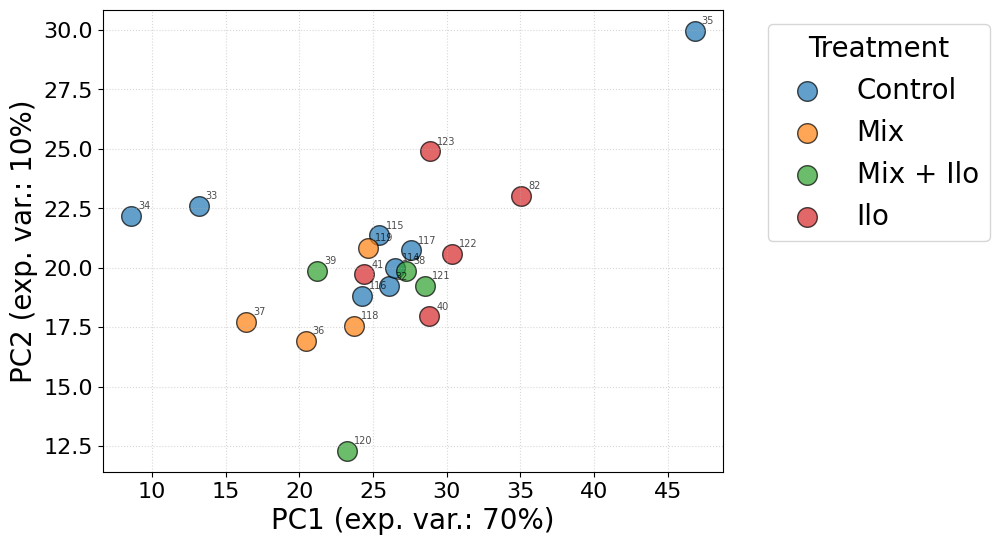

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

meta = pd.read_csv("C:/Users/79516/Downloads/metadata.tsv", sep="\t")
meta = meta[meta["run"] == 73]

new_clean, mask = remove_outliers_iqr(new)
clean_indices = np.where(mask)[0]

meta_clean = meta.iloc[clean_indices].reset_index(drop=True)
treatment_map = {
    "zero": "Control",
    "mix": "Mix",
    "ilo_only": "Ilo",
    "mix_plus_ilo": "Mix + Ilo"
}

meta_clean["treatment"] = meta_clean["treatment"].map(treatment_map)

treatments = meta_clean["treatment"].unique()
colors = dict(zip(treatments, plt.cm.tab10.colors[:len(treatments)]))

plt.figure(figsize=(8,6))
for treatment in treatments:
    idx = meta_clean[meta_clean["treatment"] == treatment].index
    plt.scatter(
        new_clean[idx, 0],
        new_clean[idx, 1],
        s=200, alpha=0.7, edgecolors="k",
        color=colors[treatment],
        label=treatment
    )

for sid, (x, y) in zip(meta_clean["sampleID"], new_clean[:, :2]):
    label = sid.split("_")[1]  
    plt.annotate(label, (x, y), xytext=(5, 5), textcoords='offset points',
                 fontsize=7, alpha=0.7)


plt.xlabel('PC1 (exp. var.: {}%)'.format(int(explained[0]*100)))
plt.ylabel('PC2 (exp. var.: {}%)'.format(int(explained[1]*100)))
plt.grid(alpha=0.5, ls=':')
plt.legend(title="Treatment", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

151
16.183837335339444


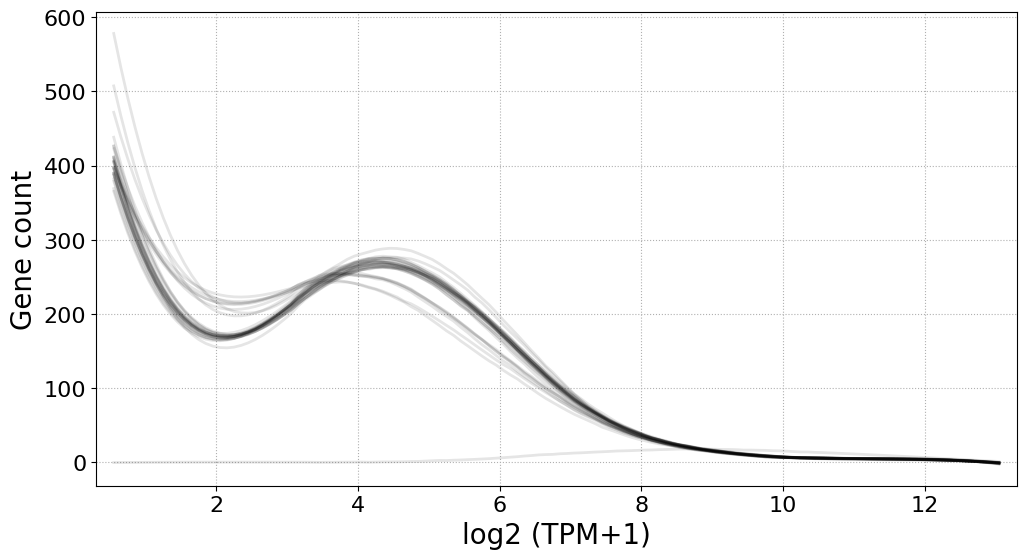

In [17]:
found_max = 15.1
number_of_bins = int(found_max*10)
print(number_of_bins)

absolute_max = 0
working_samples = log2_tpm_PO.columns.to_list()

most_likely_expressions = []
all_hats = []
for i in range(len(working_samples)):

    sample = working_samples[i]

    the_color = 'black'; the_alpha = 1/10
    
    log2TPM = log2_tpm_PO.loc[:, sample]
    if max(log2TPM) > absolute_max:
        absolute_max = max(log2TPM)
                
    hist, bin_edges = numpy.histogram(log2TPM, bins=number_of_bins, range=(0, found_max))
    half_bin = (bin_edges[1] - bin_edges[0])/2
    x = bin_edges + half_bin
    x = x[:-1]
  
    plotting_x = x[5:-20]
    plotting_hist = hist[5:-20]
    #print(plotting_x)
    
    #matplotlib.pyplot.plot(plotting_x, plotting_hist, '.', alpha=1/100, mec='none', color=the_color)
    yhat = scipy.signal.savgol_filter(plotting_hist, 51, 3)

    matplotlib.pyplot.plot(plotting_x, yhat, '-', lw=2, alpha=the_alpha, color=the_color)
    
matplotlib.pyplot.xlim([numpy.min(plotting_x)-0.25, numpy.max(plotting_x)+0.25])
#matplotlib.pyplot.ylim([0, 400])

matplotlib.pyplot.xlabel('log2 (TPM+1)')
matplotlib.pyplot.ylabel('Gene count')
matplotlib.pyplot.grid(ls=':')

matplotlib.pyplot.tight_layout()

print(absolute_max)